## 1번 문제
Logistic Regression을 사용하여 Wine 데이터를 분류 하시오.
  * Variance based feature selection 기법을 통해 분산 값이 가자 큰 feature 하나를 선택하여 모델을 학습하시오.
  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * C
    * max_iter
    * solver
  * 가장 높은 accuracy를 기록하는 파리미터 조합을 도출하시오.

  ```python
  from sklearn.datasets import load_wine

  wine = load_wine()
  ```

## 1번 문제 답안

### Setup

In [5]:
# common lib
import sklearn
import numpy as np

### Datasets



#### wine dataset

In [1]:
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine()
wine_X = wine["data"]
wine_y = wine["target"]
wine_feature_name = wine.feature_names

pd.DataFrame(wine_X, columns=wine_feature_name).head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Preprocess

#### Variance based feature selection

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


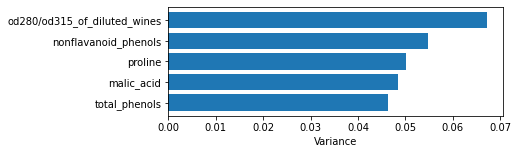

In [16]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt

selector = VarianceThreshold().fit(MinMaxScaler().fit_transform(wine_X))
variances = selector.variances_
var_sort = np.argsort(variances)[::-1]

plt.figure(figsize=(6, 2))
ypos = np.arange(5)[::-1]
plt.barh(ypos, variances[var_sort][:5], align='center')
plt.yticks(ypos, np.array(wine_feature_name)[var_sort][:5])
plt.xlabel("Variance");
print(wine_feature_name)
index = 11
wine_X_texture = wine["data"][:,index].reshape(-1,1)

#### Splitting

In [18]:
from sklearn.model_selection import train_test_split
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X_texture, wine_y, random_state=42)

### Set Hyperparmameter(C, max_iter, solver)


#### Visualization 함수

In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

In [20]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.99, np.max(test_mean)*1.01])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Validation_curve(C)

#### **C**
  * float, default=1.0
  * Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
  * 너무 작으면 강한 정규화로 underfitting 가능성이 높아짐
  * 너무 크면 outlier가 발생하여 overfitting 가능성이 높아짐

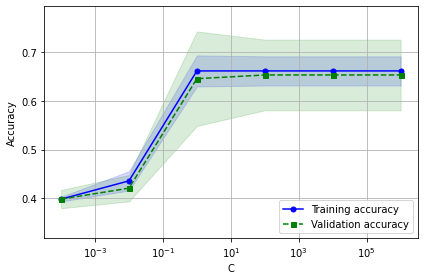

In [21]:
from sklearn.model_selection import validation_curve

param_range= [10**i for i in range(-4,7,2)]
param_name='C'

from sklearn.linear_model import LogisticRegression

log_reg_model_c = LogisticRegression(random_state=42)
log_reg_model_c.fit(wine_X_train, wine_y_train)

train_scores, test_scores = validation_curve(
                estimator=log_reg_model_c, 
                X=wine_X_train, 
                y=wine_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=True)

#### Evaluation

In [22]:
from sklearn.linear_model import LogisticRegression
proper_model_c = LogisticRegression(C=1, random_state=42)
proper_model_c.fit(wine_X_train, wine_y_train)

from sklearn import metrics

predict = proper_model_c.predict(wine_X_train)
acc = metrics.accuracy_score(wine_y_train, predict)
print('Train Accuracy(c): {}'.format(acc))

predict = proper_model_c.predict(wine_X_test)
acc = metrics.accuracy_score(wine_y_test, predict)
print('Test Accuracy(c): {}'.format(acc))

Train Accuracy(c): 0.6541353383458647
Test Accuracy(c): 0.6


#### Validation_curve(max_iter)

#### **max_iter**
  * int, default=100
  * Maximum number of iterations taken for the solvers to converge.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


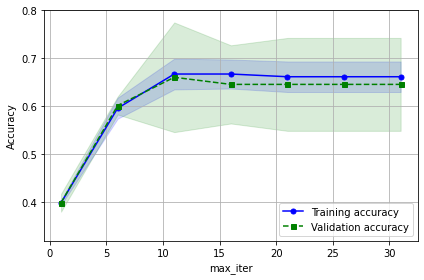

In [27]:
from sklearn.model_selection import validation_curve

param_range= [i for i in range(1, 32, 5)]
param_name='max_iter'

from sklearn.linear_model import LogisticRegression

log_reg_model_c = LogisticRegression(C=1, random_state=42)
log_reg_model_c.fit(wine_X_train, wine_y_train)

train_scores, test_scores = validation_curve(
                estimator=log_reg_model_c, 
                X=wine_X_train, 
                y=wine_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(c): 0.6541353383458647
* Test Accuracy(c): 0.6

In [46]:
from sklearn.linear_model import LogisticRegression
proper_model_m = LogisticRegression(C=1, max_iter=11, random_state=42)
proper_model_m.fit(wine_X_train, wine_y_train)

from sklearn import metrics

predict = proper_model_m.predict(wine_X_train)
acc = metrics.accuracy_score(wine_y_train, predict)
print('Train Accuracy(max_iter): {}'.format(acc))

predict = proper_model_m.predict(wine_X_test)
acc = metrics.accuracy_score(wine_y_test, predict)
print('Test Accuracy(max_iter): {}'.format(acc))

Train Accuracy(max_iter): 0.6541353383458647
Test Accuracy(max_iter): 0.6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### Validation_curve(solver)

#### **solver**

* default='lbfgs'
* solver 종류
  * newton-cg: ['l2', 'none']
  * lbfgs: ['l2', 'none']
  * liblinear: ['l1', 'l2']
  * sag: ['l2', 'none']
  * saga: ['elasticnet', 'l1', 'l2', 'none']
* solver 장점 및 용도
  * For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga'are faster for large ones;
  * For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


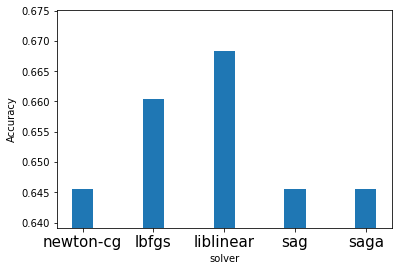

In [47]:
from sklearn.model_selection import validation_curve

param_range = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_name='solver'

from sklearn.linear_model import LogisticRegression

log_reg_model_s = LogisticRegression(C=1, max_iter=11, random_state=42)
log_reg_model_s.fit(wine_X_train, wine_y_train)

train_scores, test_scores = validation_curve(
                estimator=log_reg_model_s, 
                X=wine_X_train, 
                y=wine_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous performance**
* Train Accuracy(c): 0.6541353383458647
* Test Accuracy(c): 0.6

In [49]:
from sklearn.linear_model import LogisticRegression
proper_model_m = LogisticRegression(C=1, max_iter=11, solver='liblinear', random_state=42)
proper_model_m.fit(wine_X_train, wine_y_train)

from sklearn import metrics

predict = proper_model_m.predict(wine_X_train)
acc = metrics.accuracy_score(wine_y_train, predict)
print('Train Accuracy(solver): {}'.format(acc))

predict = proper_model_m.predict(wine_X_test)
acc = metrics.accuracy_score(wine_y_test, predict)
print('Test Accuracy(solver): {}'.format(acc))

Train Accuracy(solver): 0.6466165413533834
Test Accuracy(solver): 0.6


#### Result
* Train Accuracy(c): 0.6541353383458647
* Test Accuracy(c): 0.6



```python
LogisticRegression(C=1, max_iter=11, solver='liblinear', random_state=42)
```



## 2번 문제
Logistic Regression을 사용하여 Forest CoverType 데이터를 분류 하시오.

  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * C
    * max_iter
    * solver
  * 가장 높은 accuracy를 기록하는 파리미터 조합을 도출하시오.

  

#### Forest CoverType dataset
* Characteristic data of forest covertype
* Predict which type of covertype belongs to
* https://archive.ics.uci.edu/ml/datasets/Covertype 
* $Y$: discrete, 
  * $X_{0 ∼ 9}$: continuous
  * $X_{10 ∼ 53}$: discrete

```python
#load data
from sklearn.datasets import fetch_covtype
import pandas as pd

covtype = fetch_covtype()
covtype_X = covtype.data[:,:10]
covtype_y = covtype.target

covtype_feature_name = covtype.feature_names[:,:10]
print('Number of targets: ',len(set(covtype_y)))

pd.DataFrame(covtype_X, columns=covtype_feature_name).head(3)
```



## 2번 문제 답안

### Setup

In [50]:
# common lib
import sklearn
import numpy as np

### Datasets



#### California Housing dataset

* The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).
*  하였음

In [63]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
housing_X = housing.data
housing_y = np.round(housing.target).astype(int) # make y discrete
print('Number of target: ',len(set(housing_y)))

pd.DataFrame(housing_X, columns=housing.feature_names).head(3)

Number of target:  6


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


### Preprocess

#### Splitting

In [64]:
from sklearn.model_selection import train_test_split
housing_X_train, housing_X_test, housing_y_train, housing_y_test = train_test_split(housing_X, housing_y, random_state=42)

#### Scaling 
##### RobustScaler - 3장 참조
* 최대절대값과 0이 각각 1, 0이 되도록 스케일링

In [75]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
house_X_train_scale = scaler.fit_transform(housing_X_train)
house_X_test_scale = scaler.transform(housing_X_test)
pd.DataFrame(house_X_train_scale).head(3)

,0,1,2,3,4,5,6,7
0,0.305341,0.421053,0.034763,-0.810443,-0.327205,-0.339203,-0.121693,0.102902
1,0.821152,0.684211,0.703913,0.412542,-0.223821,-0.486164,0.764550,-0.915567
2,0.170889,0.368421,0.545805,0.111192,-0.486011,-0.684647,1.105820,-1.102902


### Set Hyperparmameter(C, max_iter, solver)


#### Visualization 함수

In [65]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

In [66]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.99, np.max(test_mean)*1.01])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Validation_curve(C)

#### **C**
  * float, default=1.0
  * Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
  * 너무 작으면 강한 정규화로 underfitting 가능성이 높아짐
  * 너무 크면 outlier가 발생하여 overfitting 가능성이 높아짐

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


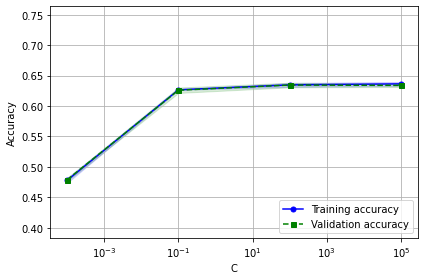

In [76]:
from sklearn.model_selection import validation_curve

param_range= [10**i for i in range(-4,7,3)]
param_name='C'

from sklearn.linear_model import LogisticRegression

log_reg_model_c = LogisticRegression(random_state=42)
log_reg_model_c.fit(housing_X_train, housing_y_train)

train_scores, test_scores = validation_curve(
                estimator=log_reg_model_c, 
                X=house_X_train_scale, 
                y=housing_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=True)

#### Evaluation

In [78]:
from sklearn.linear_model import LogisticRegression
proper_model_c = LogisticRegression(C=10**2, random_state=42)
proper_model_c.fit(house_X_train_scale, housing_y_train)

from sklearn import metrics

predict = proper_model_c.predict(house_X_train_scale)
acc = metrics.accuracy_score(housing_y_train, predict)
print('Train Accuracy(c): {}'.format(acc))

predict = proper_model_c.predict(house_X_test_scale)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(c): {}'.format(acc))

Train Accuracy(c): 0.635142118863049
Test Accuracy(c): 0.6308139534883721


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### Validation_curve(max_iter)

#### **max_iter**
  * int, default=100
  * Maximum number of iterations taken for the solvers to converge.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


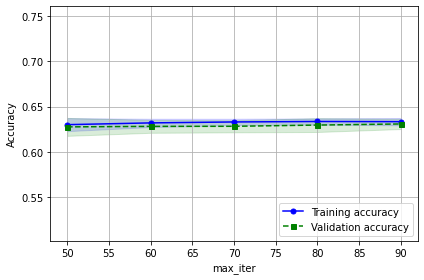

In [84]:
from sklearn.model_selection import validation_curve

param_range= [i for i in range(50, 100, 10)]
param_name='max_iter'

from sklearn.linear_model import LogisticRegression

log_reg_model_c = LogisticRegression(C=10**2, random_state=42)
log_reg_model_c.fit(house_X_train_scale, housing_y_train)

train_scores, test_scores = validation_curve(
                estimator=log_reg_model_c, 
                X=house_X_train_scale, 
                y=housing_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
* Train Accuracy(c): 0.635142118863049
* Test Accuracy(c): 0.6308139534883721

In [83]:
from sklearn.linear_model import LogisticRegression
proper_model_m = LogisticRegression(C=10**2, max_iter=80, random_state=42)
proper_model_m.fit(house_X_train_scale, housing_y_train)

from sklearn import metrics

predict = proper_model_m.predict(house_X_train_scale)
acc = metrics.accuracy_score(housing_y_train, predict)
print('Train Accuracy(max_iter): {}'.format(acc))

predict = proper_model_m.predict(house_X_test_scale)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(max_iter): {}'.format(acc))

Train Accuracy(max_iter): 0.6331395348837209
Test Accuracy(max_iter): 0.6298449612403101


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### Validation_curve(solver)

#### **solver**

* default='lbfgs'
* solver 종류
  * newton-cg: ['l2', 'none']
  * lbfgs: ['l2', 'none']
  * liblinear: ['l1', 'l2']
  * sag: ['l2', 'none']
  * saga: ['elasticnet', 'l1', 'l2', 'none']
* solver 장점 및 용도
  * For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga'are faster for large ones;
  * For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


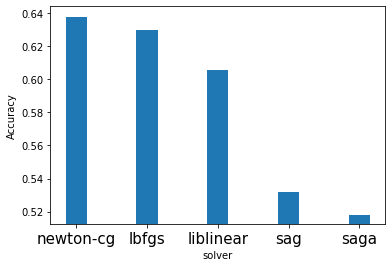

In [85]:
from sklearn.model_selection import validation_curve

param_range = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_name='solver'

from sklearn.linear_model import LogisticRegression

log_reg_model_s = LogisticRegression(C=10**2, max_iter=80, random_state=42)
log_reg_model_s.fit(house_X_train_scale, housing_y_train)

train_scores, test_scores = validation_curve(
                estimator=log_reg_model_s, 
                X=house_X_train_scale, 
                y=housing_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous performance**
* Train Accuracy(c): 0.635142118863049
* Test Accuracy(c): 0.6308139534883721

In [87]:
from sklearn.linear_model import LogisticRegression
proper_model_m = LogisticRegression(C=10**2, max_iter=80, solver='newton-cg', random_state=42)
proper_model_m.fit(house_X_train_scale, housing_y_train)

from sklearn import metrics

predict = proper_model_m.predict(house_X_train_scale)
acc = metrics.accuracy_score(housing_y_train, predict)
print('Train Accuracy(solver): {}'.format(acc))

predict = proper_model_m.predict(house_X_test_scale)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(solver): {}'.format(acc))

Train Accuracy(solver): 0.6365633074935401
Test Accuracy(solver): 0.6352713178294573


#### Result
* Train Accuracy(solver): 0.6365633074935401
* Test Accuracy(solver): 0.6352713178294573



```python
LogisticRegression(C=10**2, max_iter=80, solver='newton-cg', random_state=42)
```

